In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import jax
from flax import struct
from tqdm.auto import tqdm
from functools import partial
import utils
#jax.config.update("jax_platform_name", "cpu")
jax.devices()


[cuda(id=0)]

In [6]:
import frozen_lake
import utils
import policies

In [4]:
env = frozen_lake.FrozenLake((8, 8))
policy = policies.DQNet([16, 16], 4)

rng_key = jax.random.PRNGKey(42)
rng_key, rng_init, rng_rollout = jax.random.split(rng_key, 3)
sim_state = utils.SimulationState.create(rng_init, env, policy)

AttributeError: "RandomPolicy" object has no attribute "DQNet". If "DQNet" is defined in '.setup()', remember these fields are only accessible from inside 'init' or 'apply'.

Array(0., dtype=float32)

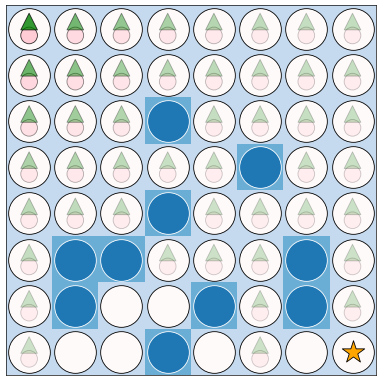

In [ ]:
rng_key, subkey = jax.random.split(rng_key)
state, transitions = sim_state.rollout(subkey, 10000)
frozen_lake.render(transitions.env_state, state.env_params)
transitions.reward.sum()